In [1]:
import pandas as pd
import os
import wordcloud
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from IPython.display import display

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set(style="darkgrid")

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 8]
[nltk_data]     nodename nor servname provided, or not known>


In [2]:
#read in data with absolute path
df = pd.read_csv('endsarsdata.csv', low_memory = False)

In [3]:
#check for duplicates
df.duplicated().sum()

0

In [5]:
#check for size of dataset
df.shape

(553744, 23)

In [4]:
# view data frame head
df.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,coordinates,place
0,https://twitter.com/demolaaaaa/status/13223274...,2020-10-30 23:59:55+00:00,@PoliceNG Hmmm\nNo one is safe oo...see the pe...,@PoliceNG Hmmm\nNo one is safe oo...see the pe...,1322327404594012160,"{'username': 'demolaaaaa', 'displayname': 'DEM...",[],[],0.0,0.0,...,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,"[{'username': 'PoliceNG', 'displayname': 'Nige...",NaN,NaN
1,https://twitter.com/OhumuMelanie/status/132232...,2020-10-30 23:59:41+00:00,#EndSARS https://t.co/F50MSpy5Hp,#EndSARS twitter.com/mrmacaronii/st…,1322327346448338944,"{'username': 'OhumuMelanie', 'displayname': 'M...",['https://twitter.com/mrmacaronii/status/13221...,['https://t.co/F50MSpy5Hp'],0.0,0.0,...,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,{'url': 'https://twitter.com/mrmacaronii/statu...,NaN,NaN,NaN
2,https://twitter.com/Mimileke/status/1322327263...,2020-10-30 23:59:21+00:00,@OfficialYDP_NG @twittbuddy #EndSARS,@OfficialYDP_NG @twittbuddy #EndSARS,1322327263623417857,"{'username': 'Mimileke', 'displayname': 'Mimi ...",[],[],0.0,0.0,...,und,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,"[{'username': 'OfficialYDP_NG', 'displayname':...",NaN,NaN
3,https://twitter.com/JaneChima1/status/13223272...,2020-10-30 23:59:17+00:00,@ShyBloggerPR @AkpraiseMedia @channelstv Nooo!...,@ShyBloggerPR @AkpraiseMedia @channelstv Nooo!...,1322327245948674048,"{'username': 'JaneChima1', 'displayname': 'Jan...",[],[],0.0,0.0,...,und,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,"[{'username': 'ShyBloggerPR', 'displayname': '...",NaN,NaN
4,https://twitter.com/adetolaodugbesi/status/132...,2020-10-30 23:59:11+00:00,@APCNigeria Thanks for speaking for the youth....,@APCNigeria Thanks for speaking for the youth....,1322327219209969665,"{'username': 'adetolaodugbesi', 'displayname':...",[],[],0.0,0.0,...,en,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,"[{'username': 'APCNigeria', 'displayname': 'AP...",NaN,NaN


In [5]:
df.describe()

,replyCount,retweetCount,retweetedTweet
count,553723.000000,5.537230e+05,0.0
mean,0.562357,2.857761e+13,NaN
std,34.806586,6.138712e+15,NaN
min,0.000000,0.000000e+00,NaN
25%,0.000000,0.000000e+00,NaN
50%,0.000000,0.000000e+00,NaN
75%,0.000000,1.000000e+00,NaN
max,18966.000000,1.318701e+18,NaN


In [6]:
# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [7]:
# pull out needed columns
df = df[['date', 'content']]
df.head()

,date,content
0,2020-10-30 23:59:55+00:00,@PoliceNG Hmmm\nNo one is safe oo...see the pe...
1,2020-10-30 23:59:41+00:00,#EndSARS https://t.co/F50MSpy5Hp
2,2020-10-30 23:59:21+00:00,@OfficialYDP_NG @twittbuddy #EndSARS
3,2020-10-30 23:59:17+00:00,@ShyBloggerPR @AkpraiseMedia @channelstv Nooo!...
4,2020-10-30 23:59:11+00:00,@APCNigeria Thanks for speaking for the youth....


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553744 entries, 0 to 553743
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     553744 non-null  object
 1   content  553734 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [10]:
# convert column to strings
df.content =df.content.astype('str')

In [11]:
df.tail()

,date,content
553739,2020-10-20 23:46:32+00:00,#EndSARS #EndSARSImmediately #BuhariResignNow ...
553740,2020-10-20 23:46:32+00:00,#EndSARS https://t.co/dcwEJkEYz9
553741,2020-10-20 23:46:32+00:00,#EndSARS https://t.co/HHaD2qVoyX
553742,2020-10-20 23:46:32+00:00,🇳🇬💔\n#Genocide #EndSARS #LekkiMassacre #Buhari...
553743,2020-10-20 23:46:32+00:00,#EndSARS https://t.co/0pKhLn7vB2


In [44]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI['en']) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet
df['content'] = df['content'].map(lambda x: cleaner(x))


In [13]:
df.head()

,date,content
0,2020-10-30 23:59:55+00:00,Hmmm No one is safe oo...see the people we’re ...
1,2020-10-30 23:59:41+00:00,EndSARS
2,2020-10-30 23:59:21+00:00,NG EndSARS
3,2020-10-30 23:59:17+00:00,Nooo!!! EndSARS
4,2020-10-30 23:59:11+00:00,Thanks for speaking for the youth. A thief is ...


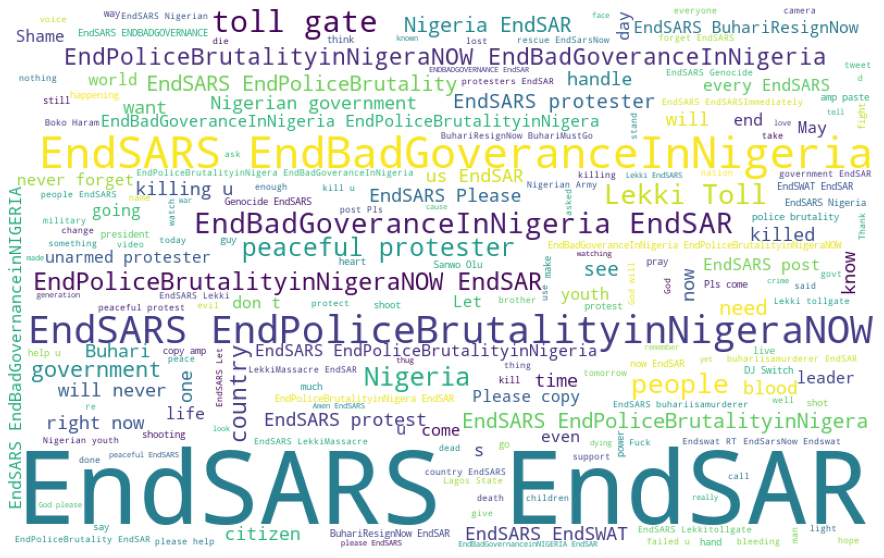

In [14]:

all_words = ' '.join([text for text in df['content']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# creating dataframe of most common 50 words with their frequency
word_counts=Counter(df.content).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(20))


,word,frq
0,EndSARS,35479
1,EndSARS EndBadGoveranceInNigeria,2190
2,Please copy &amp; paste these handles in every...,2139
3,endsars,2057
4,Endsars,1852
5,EndSARS EndPoliceBrutalityinNigeraNOW,1780
6,ENDSARS,1474
7,EndSars,1278
8,EndSARS EndPoliceBrutalityinNigeraNOW EndBadGo...,1111
9,EndSARS,1079


In [16]:
# creating dataframe of least common 20 words with their frequency
word_counts=Counter(df.content).most_common(100)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.tail(20))

,word,frq
80,Dear .. our country is killing us for peaceful...,110
81,INTERNATIONAL CRIMINAL COURT: NIGERIA: Charge ...,107
82,NG EndSARS,106
83,NewProfilePic EndSARS,106
84,EndSARS now,106
85,EndBadGoveranceInNigeria EndPoliceBrutalityinN...,105
86,buhariisamurderer BuhariResignNow BuhariMustGo...,104
87,LekkiMassacre EndSARS,103
88,Let it be on Record on 20th October 2020 - sen...,103
89,Please copy and paste these handles in every E...,101


In [18]:
df.content[:5]

0    Hmmm No one is safe oo...see the people we’re ...
1                                              EndSARS
2                                           NG EndSARS
3                                      Nooo!!! EndSARS
4    Thanks for speaking for the youth. A thief is ...
Name: content, dtype: object

### Sentiment Analysis

In [24]:
analyzer =  SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['content']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['content']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['content']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['content']]

In [28]:
df.head()

,date,content,compound,neg,neu,pos
0,2020-10-30 23:59:55+00:00,Hmmm No one is safe oo...see the people we’re ...,-0.2023,0.283,0.542,0.175
1,2020-10-30 23:59:41+00:00,EndSARS,0.0000,0.000,1.000,0.000
2,2020-10-30 23:59:21+00:00,NG EndSARS,0.0000,0.000,1.000,0.000
3,2020-10-30 23:59:17+00:00,Nooo!!! EndSARS,0.0000,0.000,1.000,0.000
4,2020-10-30 23:59:11+00:00,Thanks for speaking for the youth. A thief is ...,-0.8020,0.348,0.552,0.100


### Label the Sentiment scores as Positive, Negative or Neutral

In [29]:
#labelize tweet
label = lambda x:'neutral' if x==0 else('positive' if x>0 else 'negative')
df['label'] = df.compound.apply(label)
display(df.head(10))

,date,content,compound,neg,neu,pos,label
0,2020-10-30 23:59:55+00:00,Hmmm No one is safe oo...see the people we’re ...,-0.2023,0.283,0.542,0.175,negative
1,2020-10-30 23:59:41+00:00,EndSARS,0.0000,0.000,1.000,0.000,neutral
2,2020-10-30 23:59:21+00:00,NG EndSARS,0.0000,0.000,1.000,0.000,neutral
3,2020-10-30 23:59:17+00:00,Nooo!!! EndSARS,0.0000,0.000,1.000,0.000,neutral
4,2020-10-30 23:59:11+00:00,Thanks for speaking for the youth. A thief is ...,-0.8020,0.348,0.552,0.100,negative
5,2020-10-30 23:58:59+00:00,THE TRIAL OF THE CHICAGO SEVEN... One of the b...,0.6369,0.000,0.769,0.231,positive
6,2020-10-30 23:58:57+00:00,I hope you've not lost your anger. I hope you'...,0.7941,0.119,0.586,0.294,positive
7,2020-10-30 23:58:42+00:00,EndSARS,0.0000,0.000,1.000,0.000,neutral
8,2020-10-30 23:58:39+00:00,EndSARS use your head oh! Make person no go us...,-0.3595,0.161,0.839,0.000,negative
9,2020-10-30 23:58:33+00:00,EndSARS,0.0000,0.000,1.000,0.000,neutral


In [48]:
df.label.value_counts()

negative    208785
neutral     207104
positive    137855
Name: label, dtype: int64

In [32]:
# count sentiments
sentiment_counts=df.label.value_counts()

<AxesSubplot:>

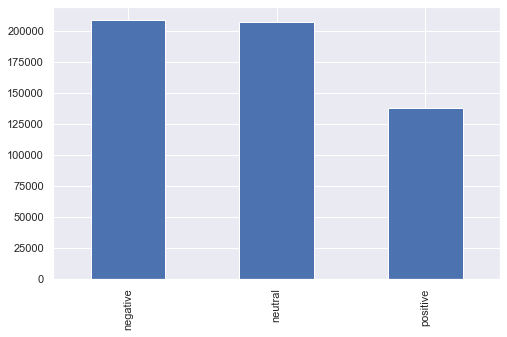

In [36]:
plt.figure(figsize=(8,5))
sentiment_counts.plot.bar(x='index',y='label')

In [38]:
date_agg = df[['date', 'label', 'content']]
date_agg.head()

,date,label,content
0,2020-10-30 23:59:55+00:00,negative,Hmmm No one is safe oo...see the people we’re ...
1,2020-10-30 23:59:41+00:00,neutral,EndSARS
2,2020-10-30 23:59:21+00:00,neutral,NG EndSARS
3,2020-10-30 23:59:17+00:00,neutral,Nooo!!! EndSARS
4,2020-10-30 23:59:11+00:00,negative,Thanks for speaking for the youth. A thief is ...


In [40]:
date_agg.head()

,date,label,content
0,2020-10-30 23:59:55+00:00,negative,Hmmm No one is safe oo...see the people we’re ...
1,2020-10-30 23:59:41+00:00,neutral,EndSARS
2,2020-10-30 23:59:21+00:00,neutral,NG EndSARS
3,2020-10-30 23:59:17+00:00,neutral,Nooo!!! EndSARS
4,2020-10-30 23:59:11+00:00,negative,Thanks for speaking for the youth. A thief is ...


In [47]:
df.date.tail()

553739    2020-10-20 23:46:32+00:00
553740    2020-10-20 23:46:32+00:00
553741    2020-10-20 23:46:32+00:00
553742    2020-10-20 23:46:32+00:00
553743    2020-10-20 23:46:32+00:00
Name: date, dtype: object